In [16]:
import numpy as np
import pandas as pd
from numpy import linalg as la
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

In [3]:
dataset = pd.read_excel('Lab Session1 Data.xlsx')

In [4]:
x = dataset.iloc[:, 0:5]
print(x)

  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment
0      C_1           20             6                 2      386
1      C_2           16             3                 6      289
2      C_3           27             6                 2      393
3      C_4           19             1                 2      110
4      C_5           24             4                 2      280
5      C_6           22             1                 5      167
6      C_7           15             4                 2      271
7      C_8           18             4                 2      274
8      C_9           21             1                 4      148
9     C_10           16             2                 4      198


In [5]:
a = dataset.iloc[:, 1:4].to_numpy()
print(a)

[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]


In [6]:
c = dataset.iloc[:, 4].to_numpy()
print(c)

[386 289 393 110 280 167 271 274 148 198]


In [7]:
d_a = a.ndim
d_c = c.ndim

In [8]:
print(d_a)
print(d_c)

2
1


In [9]:
rank_a = la.matrix_rank(a)
rank_c = la.matrix_rank(c)

In [10]:
print(rank_a)
print(rank_c)

3
1


In [11]:
print("Cost of A: \n", np.linalg.pinv(a))

Cost of A: 
 [[-0.01008596 -0.03124505  0.01013951  0.0290728   0.0182907   0.01161794
  -0.00771348  0.00095458  0.01743623 -0.00542016]
 [ 0.09059668  0.07263726  0.03172933 -0.09071908 -0.01893196 -0.06926996
   0.05675464  0.03152577 -0.07641966  0.00357352]
 [ 0.00299878  0.15874243 -0.05795468 -0.06609024 -0.06295043  0.03348017
   0.01541831 -0.01070461  0.00029003  0.05938755]]


In [12]:
a_inv = la.pinv(a)
X = np.dot(a_inv, c)
print(X)

[ 1. 55. 18.]


In [14]:
x['label'] = np.where(x['Payment'] > 200, 'Rich', 'Poor')
print(x)

  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment label
0      C_1           20             6                 2      386  Rich
1      C_2           16             3                 6      289  Rich
2      C_3           27             6                 2      393  Rich
3      C_4           19             1                 2      110  Poor
4      C_5           24             4                 2      280  Rich
5      C_6           22             1                 5      167  Poor
6      C_7           15             4                 2      271  Rich
7      C_8           18             4                 2      274  Rich
8      C_9           21             1                 4      148  Poor
9     C_10           16             2                 4      198  Poor


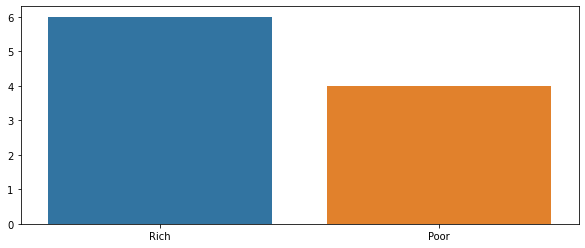

In [15]:
RP = x.label.value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x=RP.index, y=RP.values)
plt.show()

In [18]:
df = pd.read_excel('Lab Session1 Data.xlsx',sheet_name='IRCTC Stock Price')
df

,Date,Month,Day,Price,Open,High,Low,Volume,Chg%
0,"Jun 29, 2021",Jun,Tue,2081.85,2092.00,2126.90,2065.05,1.67M,0.0020
1,"Jun 28, 2021",Jun,Mon,2077.75,2084.00,2112.45,2068.40,707.73K,0.0043
2,"Jun 25, 2021",Jun,Fri,2068.85,2084.35,2088.50,2053.10,475.82K,-0.0020
3,"Jun 24, 2021",Jun,Thu,2072.95,2098.00,2098.00,2066.00,541.51K,-0.0026
4,"Jun 23, 2021",Jun,Wed,2078.25,2102.00,2111.40,2072.00,809.62K,-0.0023
...,...,...,...,...,...,...,...,...,...
244,"Jul 07, 2020",Jul,Tue,1397.40,1410.00,1411.00,1390.05,480.21K,-0.0024
245,"Jul 06, 2020",Jul,Mon,1400.75,1405.50,1415.50,1394.00,614.93K,-0.0031
246,"Jul 03, 2020",Jul,Fri,1405.10,1415.00,1425.00,1398.00,599.49K,-0.0051
247,"Jul 02, 2020",Jul,Thu,1412.35,1440.00,1467.80,1395.30,2.16M,0.0362


In [19]:
print("Mean Price: ", st.mean(df['Price']))
print("Variance Price: ", st.variance(df['Price']))

Mean Price:  1560.663453815261
Variance Price:  58732.365352539186


In [20]:
print("Wednesday's Price Mean: ")
print(st.mean(df['Price'].loc[df['Day'] == "Wed"]))

print("April Mean: ")
print(st.mean(df['Price'].loc[df['Month']=="Apr"])) 

Wednesday's Price Mean: 
1550.706
April Mean: 
1698.9526315789474


In [21]:
total_no = df['Chg%'].count()
loss_no = df['Chg%'].loc[df['Chg%']<=0].count()
print("Prob of Loss: ", loss_no/total_no)

Prob of Loss:  0.5020080321285141


In [22]:
total1_no = df['Chg%'].count()
profit_no = df['Chg%'].loc[(df['Chg%'] > 0) & (df['Day'] == 'Wed')].count()
print("Prob of Profit: ", profit_no/total1_no)

Prob of Profit:  0.08433734939759036


In [23]:
Wed_no = df['Chg%'].loc[df['Day'] == 'Wed'].count()
profit_no = df['Chg%'].loc[(df['Chg%'] > 0) & (df['Day'] == 'Wed')].count()
print("Prob of Profit: ", profit_no/Wed_no)

Prob of Profit:  0.42


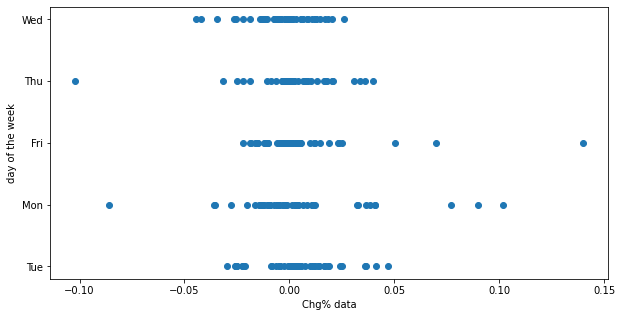

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x = df['Chg%'], y = df['Day'])
plt.xlabel("Chg% data")
plt.ylabel("day of the week")
plt.show()